In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
passengers = pd.read_csv('../datasets/titanic_dataset.csv')

In [4]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Check the shape i.e. number of rows and columns for the data
passengers.shape

(891, 12)

In [23]:
# Check the percentage of missing values
100 * passengers.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [24]:
# Any column with very high percentage of missing values should not be considered for the analysis
passengers_pass_1 = passengers.drop(columns=['Cabin'])

In [39]:
# Age being the numerical column need to cleansed to fill the null values with mean() or median(). Median is recommended over Mean as it is not impacted by outliers.
passengers_pass_1.Age = passengers_pass_1.Age.fillna(passengers_pass_1.Age.median())

In [40]:
# Drop the rows with null values in Embarked column
passengers_pass_2 = passengers_pass_1[passengers_pass_1.Embarked.notna()]

In [41]:
passengers_pass_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


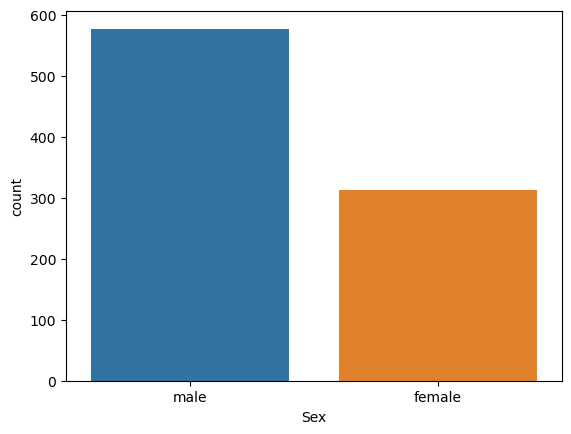

In [43]:
sns.countplot(x=passengers_pass_2.Sex)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


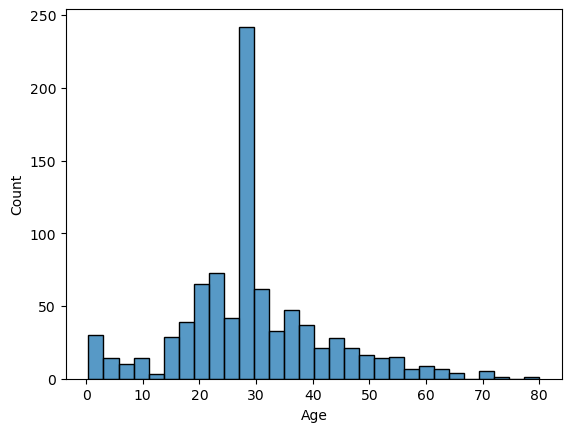

In [44]:
sns.histplot(x=passengers_pass_2.Age)
plt.show()

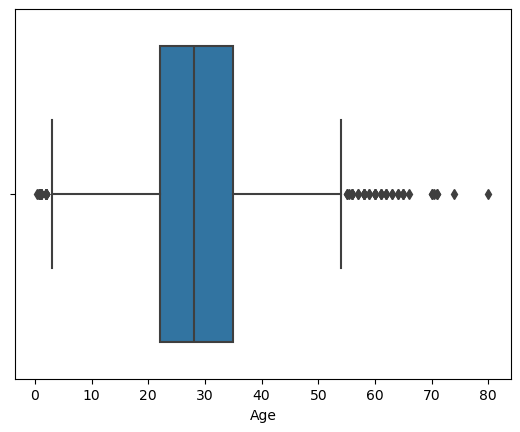

In [48]:
sns.boxplot(x=passengers_pass_2.Age)
plt.show()

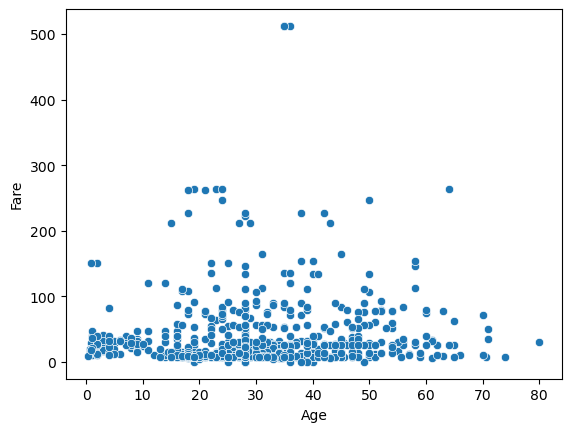

In [51]:
sns.scatterplot(x=passengers_pass_2.Age, y=passengers_pass_2.Fare)
plt.show()

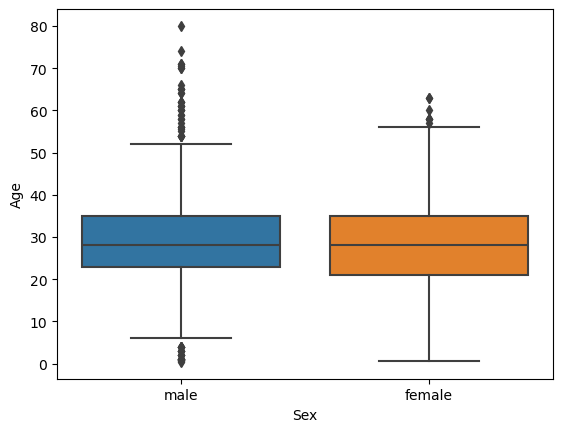

In [53]:
sns.boxplot(x=passengers_pass_2.Sex, y=passengers_pass_2.Age)
plt.show()

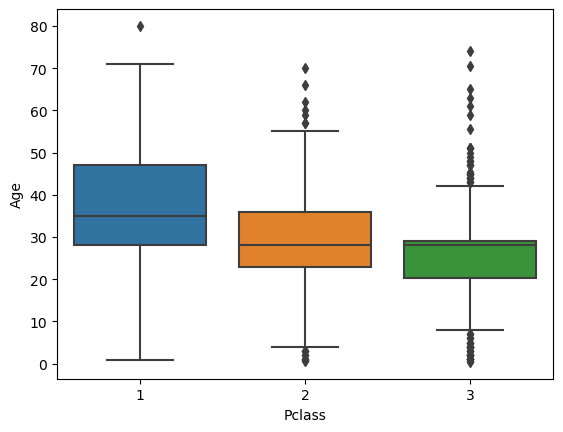

In [54]:
sns.boxplot(x=passengers_pass_2.Pclass, y=passengers_pass_2.Age)
plt.show()

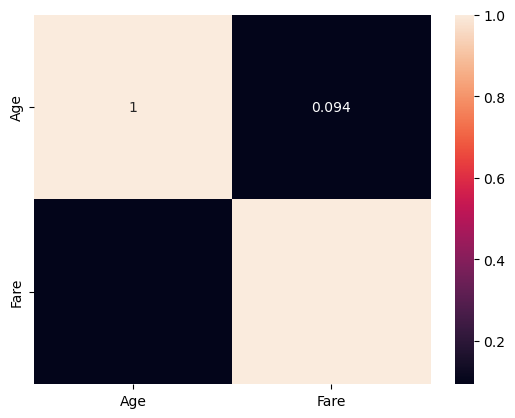

In [58]:
sns.heatmap(passengers_pass_2[['Age','Fare']].corr(), annot=True)
plt.show()